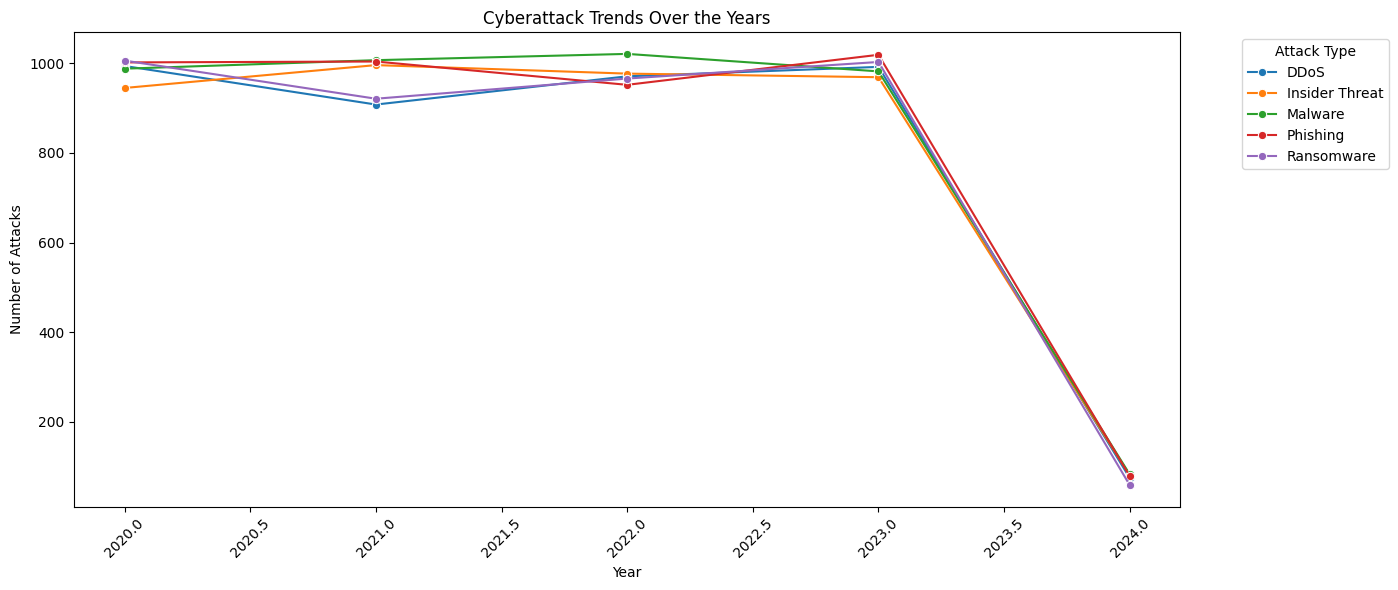

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\PYTHON 4THSEM\ai_ml_cybersecurity_dataset.csv")
df.columns = df.columns.str.strip()

# Convert timestamp to datetime and extract year
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year

# Group by year and attack type
trend_data = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Count')

# Plot line chart: Attack trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='Year', y='Count', hue='Attack Type', marker='o')
plt.title('Cyberattack Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


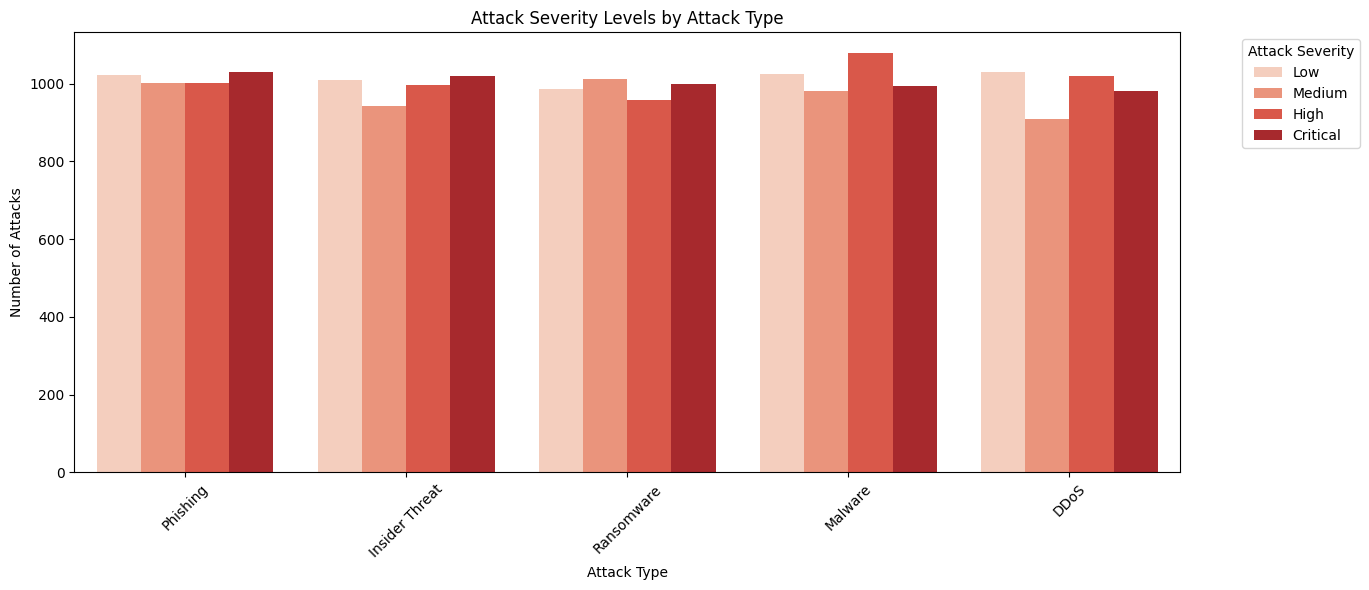

In [15]:
# Load and clean the dataset

df.columns = df.columns.str.strip()

# Count frequency of each combination of Attack Type and Severity
severity_data = df.groupby(['Attack Type', 'Attack Severity']).size().reset_index(name='Count')

# Sort by severity level (optional: you may define custom sort order)
severity_order = ['Low', 'Medium', 'High', 'Critical']  # adjust if needed
if set(severity_order).issubset(set(severity_data['Attack Severity'].unique())):
    severity_data['Attack Severity'] = pd.Categorical(severity_data['Attack Severity'], categories=severity_order, ordered=True)
    severity_data = severity_data.sort_values(by=['Attack Severity', 'Count'], ascending=[False, False])

# Plot a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=severity_data, x='Attack Type', y='Count', hue='Attack Severity', palette='Reds')
plt.title('Attack Severity Levels by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Attack Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

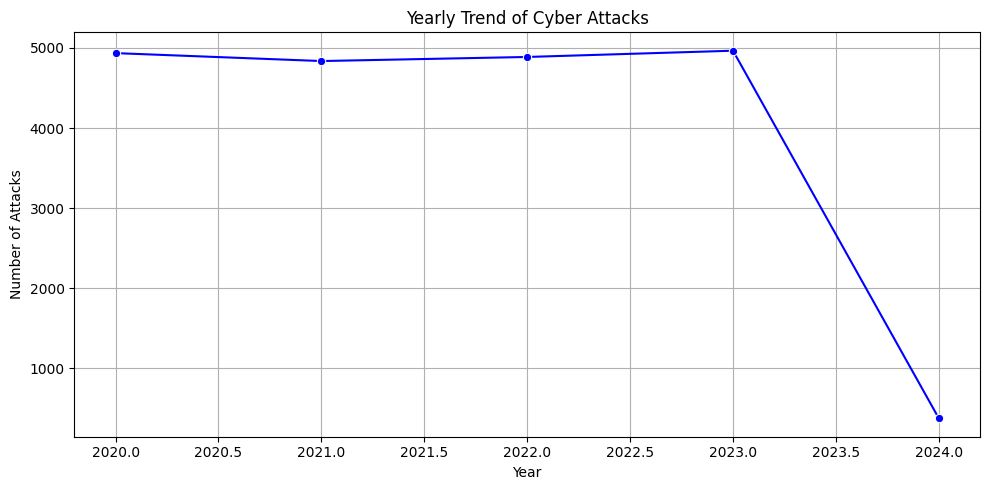

In [14]:
# Load and clean the dataset


df.columns = df.columns.str.strip()

# Convert timestamp to datetime and extract the year
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year

# Count number of attacks per year
yearly_counts = df['Year'].value_counts().sort_index()

# Plotting line chart for temporal trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='blue')
plt.title('Yearly Trend of Cyber Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()

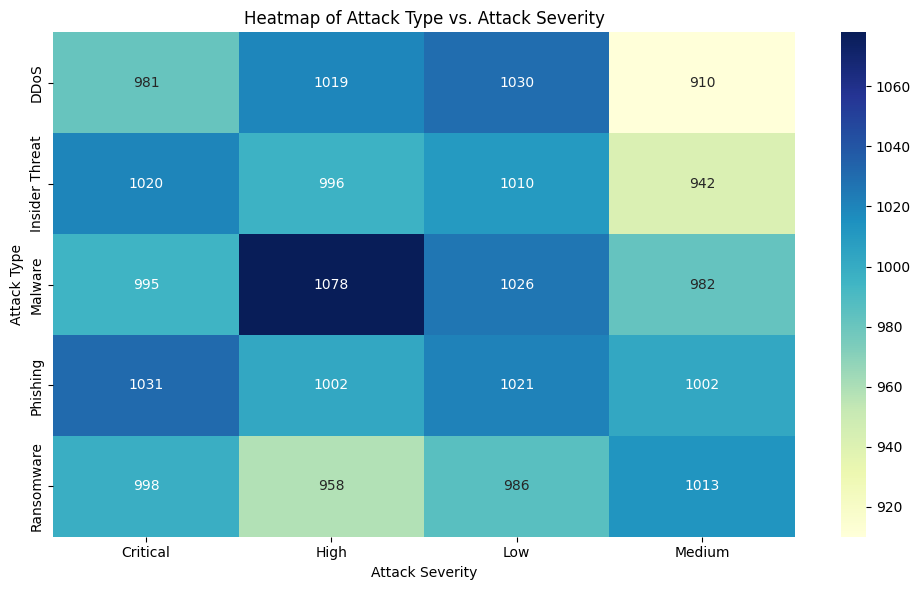

In [13]:
# Load and clean the dataset

df.columns = df.columns.str.strip()

# Create a crosstab between Attack Type and Attack Severity
heatmap_data = pd.crosstab(df['Attack Type'], df['Attack Severity'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Attack Type vs. Attack Severity')
plt.xlabel('Attack Severity')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


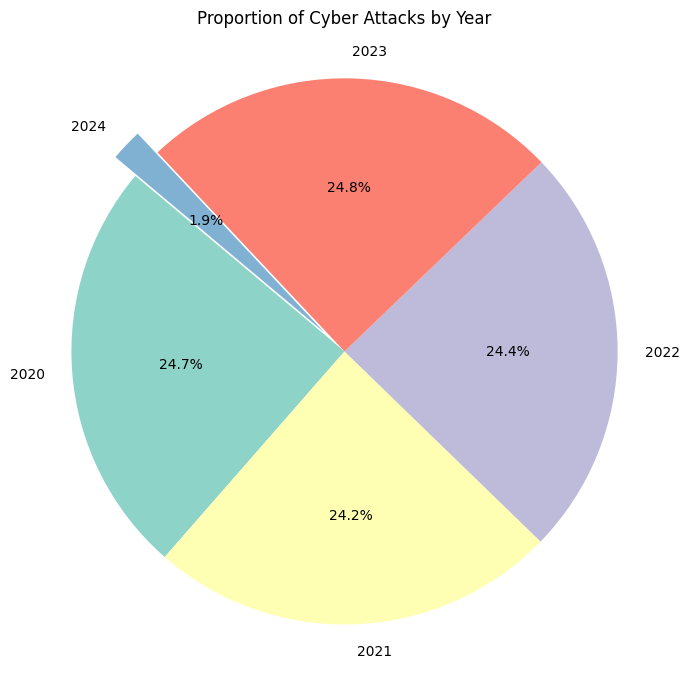

In [12]:
df.columns = df.columns.str.strip()

# Convert Timestamp and extract year
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year

# Get counts of attacks per year
year_counts = df['Year'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(7, 7))
explode = [0.1 if val == year_counts.min() else 0 for val in year_counts]  # pop out the year with least attacks
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Set3.colors)
plt.title('Proportion of Cyber Attacks by Year')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()